In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, splrep, splev
import dispersion
from dispersion import Catalogue
from dispersion import Material
#from refractive_index_database import get_permittivity
from dispersion import get_config
from dispersion import Spectrum
#from dispersion import get_permittivity
from dispersion import Interpolation, Extrapolation, Sellmeier
from dispersion import Writer
import os

test_data = np.array([[400., 1.7, 0.1],
                       [500., 1.6, 0.05],
                       [600., 1.5, 0.0]])

test_n = np.array([[400., 1.7],
                       [500., 1.6],
                       [600., 1.5]])

model_params = {'name': 'Sellmeier', 'specrtrum_type':'wavelength', 'unit':'micrometer', 'valid_range':np.array([0.361,5.135]),
                'parameters': np.array([0, 1.347091, 0.062543, 2.117788, 0.166739, 9.452943, 24.320570])}
  

    

mat = Material(tabulated_nk=test_data,
               spectrum_type='wavelength', unit='nanometer')
mat.meta_data['Reference'] = "Literature reference to the data"
mat.meta_data['Comment'] = "Any additional information goes here"
mat.meta_data['Name'] = "Short name of the material"
mat.meta_data['FullName'] = "Full name of the material"
mat.meta_data['Author'] = "The author of this dataset"


mat2 = Material(model_kw=model_params, spectrum_type='wavelength', unit='micrometer')
mat2.meta_data['Reference'] = "D. L Wood and K. Nassau. Refractive index of cubic zirconia stabilized with yttria, <a href=\"https://doi.org/10.1364/AO.21.002978\"><i>Appl. Opt.</i> <b>21</b>, 2978-2981 (1982)</a>"
mat2.meta_data['Comment'] = "Cubic zirconiza; 25 °C; Y<sub>2</sub>O<sub>3</sub> content: 12.0 mol %"
mat2.meta_data['MetaComment'] = " this file is part of refractiveindex.info database\n refractiveindex.info database is in the public domain\n copyright and related rights waived via CC0 1.0"
mat2.meta_data['Specification'] = {'temperature': '25 $\degree$C',
                                   'film_thickness': '100 nm'}

cwd = os.getcwd()
filepath = os.path.join(cwd, "testfile.txt")
#print(list(mat2.meta_data.keys()))

write = Writer(filepath, mat)
write.write_file( use_rii_aliases=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
cat = Catalogue(rebuild =['UserData'])
cat.edit_interactive()

Building UserData


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [22]:
cwd = os.getcwd()
test_mat = Material(file_path='testfile.txt')
print(test_mat.get_maximum_valid_range())
#for item in test_mat._file_data['MetaData'].items():
#    print("{}:{}".format(item[0],item[1]))
write2 = Writer(os.path.join(cwd, "testfile2.txt"), test_mat)
write2.write_file()

[400. 600.]


In [9]:
def make_example_txt(dir):
    test_data = np.array([[400., 1.7, 0.1],
                          [500., 1.6, 0.05],
                          [600., 1.5, 0.0]])
    mat = Material(tabulated_nk=test_data,
                   spectrum_type='wavelength', unit='nanometer')
    mat.meta_data['Reference'] = "Literature reference to the data"
    mat.meta_data['Comment'] = "Any additional information goes here"
    mat.meta_data['Name'] = "Short name of the material"
    mat.meta_data['FullName'] = "Full name of the material"
    mat.meta_data['Author'] = "The author of this dataset"
    mat.meta_data['MetaComment'] = [" This is a multiline meta-comment\n" +
                                    " which provides information not\n" +
                                    " in metadata"]
    filepath = os.path.join(dir, "example_file.txt")
    
    #write = Writer(filepath, mat)
    #write.write_file()
make_example_txt(cwd)

ValueError: Expected 1D or 2D array, got 0D array instead

In [11]:
def make_example_yaml(dir_path):
    model_params = {'name': 'Sellmeier',
                    'specrtrum_type':'wavelength',
                    'unit':'micrometer',
                    'valid_range':np.array([0.350, 2.0]),
                    'parameters': np.array([0, 1.0, 0.05,
                                            2.0, 0.1,
                                            10., 25.])}
    mat = Material(model_kw=model_params, spectrum_type='wavelength', unit='micrometer')
    mat.meta_data['Reference'] = "Literature reference to the data"
    mat.meta_data['Comment'] = "Any additional information goes here"
    mat.meta_data['Name'] = "Short name of the material"
    mat.meta_data['FullName'] = "Full name of the material"
    mat.meta_data['Author'] = "The author of this dataset"
    mat.meta_data['MetaComment'] = " This is a multiline meta-comment\n" + \
                                   " which provides information not\n" + \
                                   " in metadata"
    k_data = np.array([[400., 0.1],
                          [500., 0.05],
                          [600., 0.0]])
    interp = Interpolation(k_data, unit='nm')
    #print(mat.data['imag'])
    mat.data['imag'] = interp    
    
    #print(mat.data['imag'])
    
    filepath = os.path.join(dir_path, "example_file2.yml")
    write = Writer(filepath, mat)
    write.write_file()
make_example_yaml(cwd)

{'DataType': 'model Sellmeier', 'ValidRange': '0.35 2.', 'SpectrumType': 'wavelength', 'Unit': 'micrometer', 'Yields': 'n', 'Parameters': '0.    1.    0.05  2.    0.1  10.   25.'}
{'DataType': 'tabulated', 'ValidRange': '400. 600.', 'SpectrumType': 'wavelength', 'Unit': 'nm', 'Data': '4.e+02 1.e-01\n5.e+02 5.e-02\n6.e+02 0.e+00'}


In [8]:
inputs = {'EMOmega':1, 'path':"", 'name':""}
print(not any(isinstance(inputs['EMOmega'], val) for val in {float, complex}))
get_permittivity(inputs)

True
{'EMOmega': 1, 'path': '', 'name': ''}


ValueError: input EMOmega must be of types {<class 'complex'>, <class 'float'>}

In [11]:
config = get_config()
print(config)
print_yaml_string(config)

{'Path': 'D:\\Documents\\Work\\HZB\\Scripts\\Python\\refractive_index_database\\data', 'File': 'catalogue.csv', 'Interactive': True, 'Modules': {'UserData': True, 'RefractiveIndexInfo': True, 'Filmetrics': True}, 'ReferenceSpectrum': {'Value': 632.8, 'SpectrumType': 'wavelength', 'Unit': 'nanometer'}}


NameError: name 'print_yaml_string' is not defined

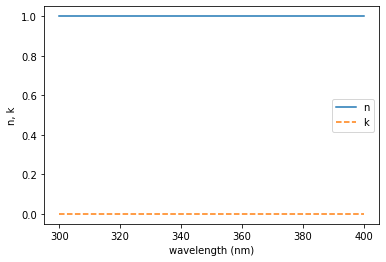

In [12]:
wvls = np.arange(300,410,10)
n = np.ones(wvls.shape)
k = np.zeros(wvls.shape)
data = np.vstack([wvls,n,k]).T

mat = MaterialData(tabulated_nk=data)
mat._plot_data('nk')

(3.075384536082474+0j)


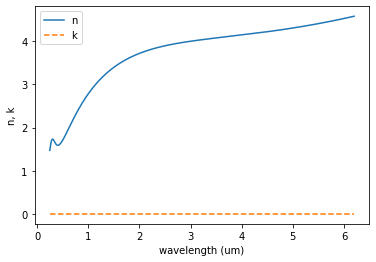

In [6]:
mdb = MaterialDatabase()
aSi = mdb.get_material("Nickel")
mat = aSi
mat.remove_absorption()
extended_spectrum = Spectrum(1200.0,unit='nanometer')
#mat.extrapolate(extended_spectrum,spline_order=1)
spectrum = Spectrum(1200.0,unit='nanometer')
mat._plot_data('nk')
print(mat.get_nk_data(spectrum))

In [10]:
print(mat._file_data)

{'MetaData': {'FullName': '', 'Author': '', 'Reference': 'A. D. Rakić, A. B. Djurišic, J. M. Elazar, and M. L. Majewski. Optical properties of metallic films for vertical-cavity optoelectronic devices, <a href="https://doi.org/10.1364/AO.37.005271"><i>Appl. Opt.</i> <b>37</b>, 5271-5283 (1998)</a><br>[<a href="https://github.com/polyanskiy/refractiveindex.info-scripts/blob/master/scripts/Rakic%201998%20-%20Ni%20(BB%20model).py">Calculation script (Python)</a>]', 'Comment': 'Fit of experimental data from several sources to Brendel-Bormann (BB) model', 'Name': ''}, 'Datasets': [{'MetaData': {'Unit': '', 'SpectrumType': '', 'ValidRange': '', 'DataType': 'tabulated nk'}, 'Data': array([[ 0.24797,  1.4724 ,  2.0065 ],
       [ 0.25201,  1.5068 ,  2.0205 ],
       [ 0.25612,  1.5408 ,  2.0308 ],
       [ 0.2603 ,  1.5737 ,  2.0373 ],
       [ 0.26454,  1.6046 ,  2.0403 ],
       [ 0.26886,  1.633  ,  2.0404 ],
       [ 0.27324,  1.6585 ,  2.0378 ],
       [ 0.2777 ,  1.6804 ,  2.0333 ],
    

In [16]:
Ag = mdb.get_material('Silver')
print(Ag.data['real'].valid_range.values)
Ag.extrapolate((300,2000))
print(Ag.data['real'].valid_range.values)

[0.1879 1.937 ]
[ 300 2000]


In [13]:
import os
print(os.path.normpath("/data/numerik/people/bzfmanle/Simulations/pypmj/database/RefractiveIndexInfo/data\\main\\Ni\\Rakic-BB.yml"))

\data\numerik\people\bzfmanle\Simulations\pypmj\database\RefractiveIndexInfo\data\main\Ni\Rakic-BB.yml


In [9]:
mdb.view_interactive()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
mdb.save_interactive()
mdb.save_to_file()

In [28]:
aSi = mdb.get_material("amorphous_silicon")

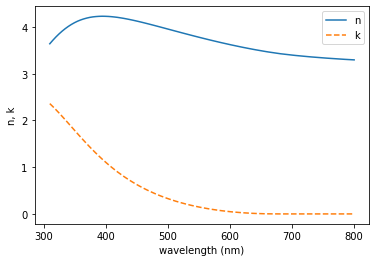

In [29]:
aSi._plot_data('nk',values=np.linspace(310,800,100))

In [10]:
#wavelength = np.linspace(400,1000) # nm
#spec = Spectrum(wavelength,unit='nanometer')

ang_freq = spec.convert_to('angularfrequency','1/s')
config = get_config()
inputs = {'path':config['Path'],
         'name':'Silver',
         'EMOmega':ang_freq}
eps = get_permittivity(inputs)
print(eps)

(-9.799934621455998, 0.3130884)


3


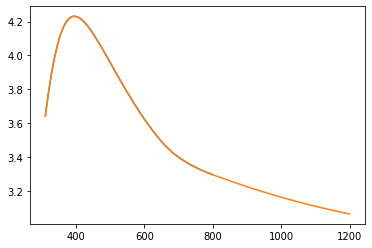

In [38]:
mat = aSi
mat.data['imag']
values = np.linspace(310,800,100)
spectrum = Spectrum(values,'wavelength','nanometer')
n_values = mat.data['real'].evaluate(spectrum)
plt.plot(values,n_values)
spline = splrep(values,n_values,k=2)
print(len(spline))
extended_values = np.linspace(310,1200,100)
recreatate = splev(extended_values,spline)
plt.plot(extended_values,recreatate)
#extrap = Extrapolation(Ag.data['real'],[0.1879,2.0],spectrum_type='wavelength',unit='micrometer')


In [24]:
tup = (None,30)
print(tup[1])
print(tup[0])
print(tup[0]==None)

30
None
True
